In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

In [ ]:
# Loading data
data = np.loadtxt(os.path.join('data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

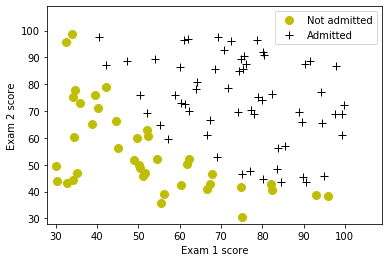

In [ ]:
exam_1 = data[:, 0]
exam_2 = data[:, 1]
y = data[:, 2]

M = len(exam_1)

plt.plot(exam_1[y == 0], exam_2[y == 0], 'yo', ms=8, label='Not admitted')
plt.plot(exam_1[y == 1], exam_2[y == 1], 'k+', ms=8, label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim(28, 109)
plt.ylim(28, 109)
plt.legend(numpoints=1, loc=1)
plt.savefig('media/assignment2/fig_1.png', dpi=300)

### Sigmoid Function

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

### Cost Function

Define parameters for function

In [ ]:
cost_history = [] # array to log costs calculated below

def cost_function(theta, X, y, M):
    global cost_history
    
    cost = 1 / M * (- y.dot(np.log(sigmoid(theta.dot(X.T)))) - (1 - y).dot(np.log(1 - sigmoid(theta.dot(X.T)))))
    gradient = 1 / M * (sigmoid(theta.dot(X.T)) - y).dot(X)
    
    cost_history.append(cost)
    return cost, gradient

Test it with parameters

In [ ]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.vstack((np.ones(M), exam_1, exam_2)).T
theta_0 = np.zeros(3)

In [ ]:
cost_0, grad_0 = cost_function(theta_0, X, y, M)

print("Cost at initial theta (zeros): ", str(cost_0))
print("Gradient at initial theta (zeros):", ", ".join('%.3f' % item for item in grad_0))

Cost at initial theta (zeros):  0.6931471805599452
Gradient at initial theta (zeros): -0.100, -12.009, -11.263


### Optimisation of parameters

Using scipy's "minimize" function

In [ ]:
cost_history = []
# using optimise.minimize as a Python replacement for fminunc.
res = optimize.minimize(cost_function, theta_0, method='L-BFGS-B', args=(X, y, M), jac=True)

cost = res.fun
theta = res.x

print ('Cost at theta found by optimize.minimize: {: .3f}'.format(cost))
print('Expected cost (approx): 0.203\n')

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize:  0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [ ]:
print(res)

      fun: 0.20349770159166272
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.17352662e-07, -2.32115685e-05, -2.58099085e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 27
     njev: 33
   status: 0
  success: True
        x: array([-25.16141038,   0.20623233,   0.20147212])


In [ ]:
theta = res['x']

print('Cost at best-fit theta: %.3f' % res['fun'] )
print('Best-fit theta:', ', '.join('%.3f' % item for item in theta))

Cost at best-fit theta: 0.203
Best-fit theta: -25.161, 0.206, 0.201


### Visualise cost as function of steps taken
Note that the first and second calls yield "nan" values, thus why there's no points for steps 1 and 2.

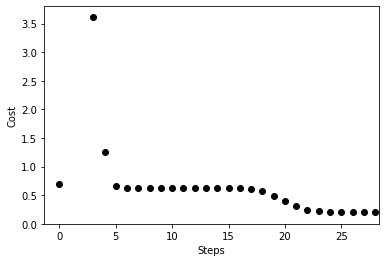

In [ ]:
plt.figure()
plt.scatter(np.arange(len(cost_history)), cost_history, c='k', marker='o')
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.xlim(-res['nit'] * 0.05, res['nit'] * 1.05)
plt.ylim(0, max(cost_history) * 1.05)
plt.savefig('media/assignment2/cost_vs_steps.png', dpi=300)

#### Visualisation of decision boundary 

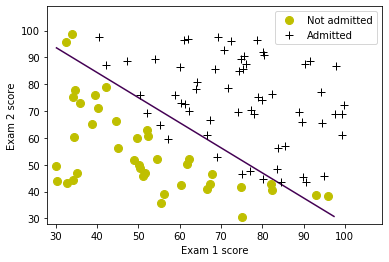

In [ ]:
num_pts = 10
x_pts, y_pts = np.ogrid[min(exam_1):max(exam_1):num_pts * 1j, min(exam_2):max(exam_2):num_pts * 1j]

plt.figure()
plt.plot(exam_1[y == 0], exam_2[y == 0], 'yo', ms=8, label='Not admitted')
plt.plot(exam_1[y == 1], exam_2[y == 1], 'k+', ms=8, label='Admitted')
plt.contour(x_pts.ravel(), y_pts.ravel(), theta[0] + theta[1] * x_pts + theta[2] * y_pts - 0.5, levels=[0])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim(28, 109)
plt.ylim(28, 109)
plt.legend(numpoints=1, loc=1)
plt.savefig('media/assignment2/decision_boundary.png', dpi=300)

### Evaluating logistic regression

In [ ]:
def prediction(theta, exam_1, exam_2):
    return sigmoid(theta[0] + exam_1 * theta[1] + exam_2 * theta[2])

def accuracy(theta, exam_1, exam_2, y, M):
    return np.sum(np.around(prediction(theta,exam_1,exam_2)) == y) / M

In [ ]:
print('For a student with scores 45 and 85, we predict an admission probability of %.3f.' \
    % prediction(theta, 45, 85))

print('Train Accuracy: %.3f' % accuracy(theta, exam_1, exam_2, y, M))

For a student with scores 45 and 85, we predict an admission probability of 0.776.
Train Accuracy: 0.890


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>